This is a continuation of the studies of different models applied in the same dataset. This is gonna evaluate the performance of XGBoost, comparing it with the Linear Regression model which got the best performance so far (~91%).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_predict, train_test_split
from sklearn.pipeline import Pipeline

from xgboost import XGBRegressor

# Data Analysis

In [ ]:
#lr_folder = 'https://drive.google.com/drive/folders/1__hvtFCPOX8ZIZs6SuJsrrBOckneIEc6?usp=drive_link'
lrrf_sharelink = 'https://drive.google.com/file/d/14u9NNOEfPz5RjgIp27093i-vCHfkel5G/view?usp=drive_link'
lrrf_residuals = pd.read_csv('https://drive.google.com/uc?export=download&id='+lrrf_sharelink.split('/d/')[1].split('/')[0])
lrrf_residuals.rename(columns={'residuals': 'lr_residuals', 'y_pred':'lr_y_pred'}, inplace=True)
lrrf_residuals.head()

,y,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price,lr_y_pred,lr_residuals,rf_y_pred,rf_residuals
0,1.059034e+06,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,1.222336e+06,-163302.296364,1.279568e+06,-220534.296958
1,1.505891e+06,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,1.496366e+06,9525.075134,1.494897e+06,10993.476558
2,1.058988e+06,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,1.252835e+06,-193847.000494,1.232564e+06,-173575.967646
3,1.260617e+06,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,1.120134e+06,140482.709941,1.094992e+06,165624.594252
4,6.309435e+05,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,8.449589e+05,-214015.394800,7.986893e+05,-167745.844216


Avg_Area_Income:
The average annual income of residents in the area (probably in USD or local currency, per household or per person).

Avg_Area_House_Age:
The average age of the houses in the area (likely in years).

Avg_Area_Number_of_Rooms:
The average number of rooms (not just bedrooms) per house in the area.

Avg_Area_Number_of_Bedrooms:
The average number of bedrooms per house in the area.

Area_Population:
The total population of the area.

Price:
The price of a house in that area or a specific listing.

In [ ]:
USh_df = lrrf_residuals.drop(["y", "lr_y_pred", "lr_residuals", "rf_y_pred", "rf_residuals"], axis=1)
USh_df.head()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [ ]:
USh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Avg_Area_Income              5000 non-null   float64
 1   Avg_Area_House_Age           5000 non-null   float64
 2   Avg_Area_Number_of_Rooms     5000 non-null   float64
 3   Avg_Area_Number_of_Bedrooms  5000 non-null   float64
 4   Area_Population              5000 non-null   float64
 5   Price                        5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


There aren't any null values in this dataframe.

In [ ]:
USh_df.describe()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


Checking the correlations between Price and features.

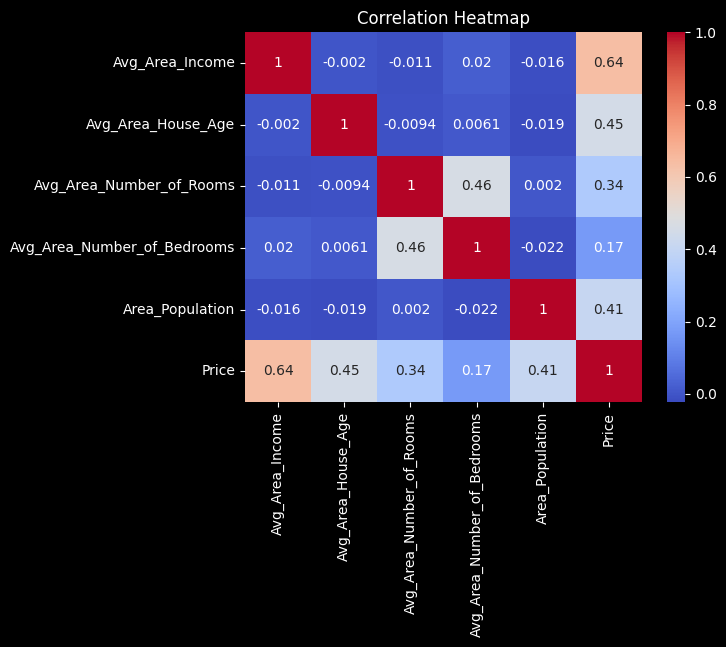

In [ ]:
plt.style.use('dark_background')
# Create the heatmap
sns.heatmap(USh_df.corr(), annot=True, cmap='coolwarm')

# Some configurations so it looks better on github dark background

plt.title('Correlation Heatmap', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

plt.show()

```Avg_Area_Income```, ```Avg_Area_House_Age```, and ```Area_Population``` are mildly correlated with ```Price```.

```Avg_Area_Number_of_Rooms``` and ```Avg_Area_Number_of_Bedrooms``` are mildly correlated with each other but weakly correlated with ```Price```.

# Modelling

In [ ]:
# Separating X features and y target
X = USh_df.drop(["Price","Avg_Area_Number_of_Bedrooms"], axis=1)
y = USh_df["Price"]

Something to keep in mind here, metrics for regression models:

| Metric                     | Description                                                  | When to Use                                              |
|----------------------------|--------------------------------------------------------------|-----------------------------------------------------------|
| **MAE** (Mean Absolute Error) | Average of absolute errors                                  | When you want all errors treated equally                  |
| **MSE** (Mean Squared Error)  | Average of squared errors                                    | When larger errors should be penalized more               |
| **RMSE** (Root Mean Squared Error) | Square root of MSE                                         | Like MSE, but in the same units as the target variable    |
| **R²** (R-squared / Coefficient of Determination) | Proportion of variance explained by the model | When you want to measure how well your model explains the variability |


In [ ]:
# # splitting data to check results on unseen data
# X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # XGBoost regressor
# xgb = XGBRegressor(random_state=42)

# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform, randint

# param_dist = {
#     'n_estimators': randint(100, 300),
#     'max_depth': randint(5, 30),
#     'learning_rate': uniform(0.01, 0.1),
#     'subsample': uniform(0.8, 0.2),
#     'colsample_bytree': uniform(0.8, 0.2),
#     'gamma': uniform(0, 0.3),
#     'reg_alpha': uniform(0, 0.1),
#     'reg_lambda': uniform(1, 2)
# }

# random_search = RandomizedSearchCV(
#     estimator=XGBRegressor(random_state=42),
#     param_distributions=param_dist,
#     n_iter=15,  # number of random combos to try — tune this
#     scoring='r2',
#     cv=5,  # fewer folds = faster
#     verbose=1,
#     n_jobs=-1,
#     random_state=42
# )

# random_search.fit(X_trainval, y_trainval)

# # Best estimator and score
# print("Best parameters:", random_search.best_params_)
# print("Best score:", random_search.best_score_)

# best_model = random_search.best_estimator_

# # Predictions on unseen data to evaluate better the results
# y_pred = best_model.predict(X_test)

# # Evaluate
# print("Unseen Test R²:", r2_score(y_test, y_pred))

O código acima foi comentado para evitar reexecução, os resultados foram os seguintes:
```
Best parameters: {'colsample_bytree': np.float64(0.9818640804157565), 'gamma': np.float64(0.07763399448000508), 'learning_rate': np.float64(0.0762522284353982), 'max_depth': 6, 'n_estimators': 233, 'reg_alpha': np.float64(0.020794166286818884), 'reg_lambda': np.float64(2.135400655639983), 'subsample': np.float64(0.8062626584911118)}
Best score: 0.8967180749587321
Unseen Test R²: 0.9013559961252099
```

In [ ]:
# Let's train and predict on all unseen data using cross_val_predict in order to make a unbiased comparison with the Linear Regression results
y_pred = cross_val_predict(XGBRegressor(colsample_bytree=np.float64(0.9818640804157565), gamma=np.float64(0.07763399448000508), learning_rate=np.float64(0.0762522284353982), max_depth=6, n_estimators=233, reg_alpha=np.float64(0.020794166286818884), reg_lambda=np.float64(2.135400655639983), subsample=np.float64(0.8062626584911118)), X, y, cv=5)
print("R2:", r2_score(y, y_pred))

R2: 0.8995726854212556


XGBoost gets closer to Linear Regression, compared to Random Forest, but still underperforms.

In [ ]:
xgb_results_df = pd.DataFrame({'y': y, 'y_pred': y_pred, 'residuals': y - y_pred})

# Display the DataFrame
xgb_results_df

,y,y_pred,residuals
0,1.059034e+06,1.271832e+06,-212798.692130
1,1.505891e+06,1.474650e+06,31240.539847
2,1.058988e+06,1.229871e+06,-170882.637124
3,1.260617e+06,1.088468e+06,172148.556629
4,6.309435e+05,8.225083e+05,-191564.823161
...,...,...,...
4995,1.060194e+06,1.051934e+06,8259.410885
4996,1.482618e+06,1.414141e+06,68476.978622
4997,1.030730e+06,9.841532e+05,46576.395652
4998,1.198657e+06,1.288574e+06,-89917.127592


In [ ]:
xgb_residuals = USh_df.join(xgb_results_df)

duplicates = xgb_residuals['y'].duplicated()

print(duplicates.sum())

xgb_residuals.set_index('y', inplace=True)
xgb_residuals

0


,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price,y_pred,residuals
y,,,,,,,,
1.059034e+06,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,1.271832e+06,-212798.692130
1.505891e+06,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,1.474650e+06,31240.539847
1.058988e+06,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,1.229871e+06,-170882.637124
1.260617e+06,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,1.088468e+06,172148.556629
6.309435e+05,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,8.225083e+05,-191564.823161
...,...,...,...,...,...,...,...,...
1.060194e+06,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,1.051934e+06,8259.410885
1.482618e+06,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,1.414141e+06,68476.978622
1.030730e+06,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,9.841532e+05,46576.395652


In [ ]:
results_df = lrrf_residuals.join(xgb_residuals[['y_pred','residuals']].add_prefix('xgb_'), on='y')
results_df.reset_index(inplace=True)
results_df.head()

,index,y,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price,lr_y_pred,lr_residuals,rf_y_pred,rf_residuals,xgb_y_pred,xgb_residuals
0,0,1.059034e+06,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,1.222336e+06,-163302.296364,1.279568e+06,-220534.296958,1.271832e+06,-212798.692130
1,1,1.505891e+06,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,1.496366e+06,9525.075134,1.494897e+06,10993.476558,1.474650e+06,31240.539847
2,2,1.058988e+06,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,1.252835e+06,-193847.000494,1.232564e+06,-173575.967646,1.229871e+06,-170882.637124
3,3,1.260617e+06,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,1.120134e+06,140482.709941,1.094992e+06,165624.594252,1.088468e+06,172148.556629
4,4,6.309435e+05,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,8.449589e+05,-214015.394800,7.986893e+05,-167745.844216,8.225083e+05,-191564.823161


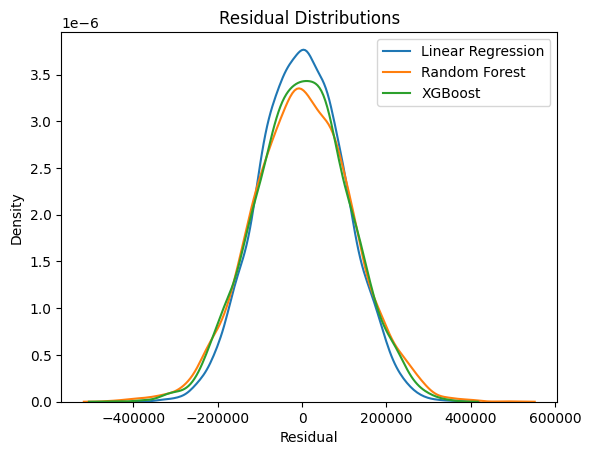

In [ ]:
plt.style.use('default')

# Plot KDE curves for the two residuals
sns.kdeplot(results_df["lr_residuals"], label='Linear Regression', fill=False)
sns.kdeplot(results_df["rf_residuals"], label='Random Forest', fill=False)
sns.kdeplot(results_df["xgb_residuals"], label='XGBoost', fill=False)


plt.legend()
plt.title('Residual Distributions')
plt.xlabel('Residual')
plt.ylabel('Density')
plt.show()

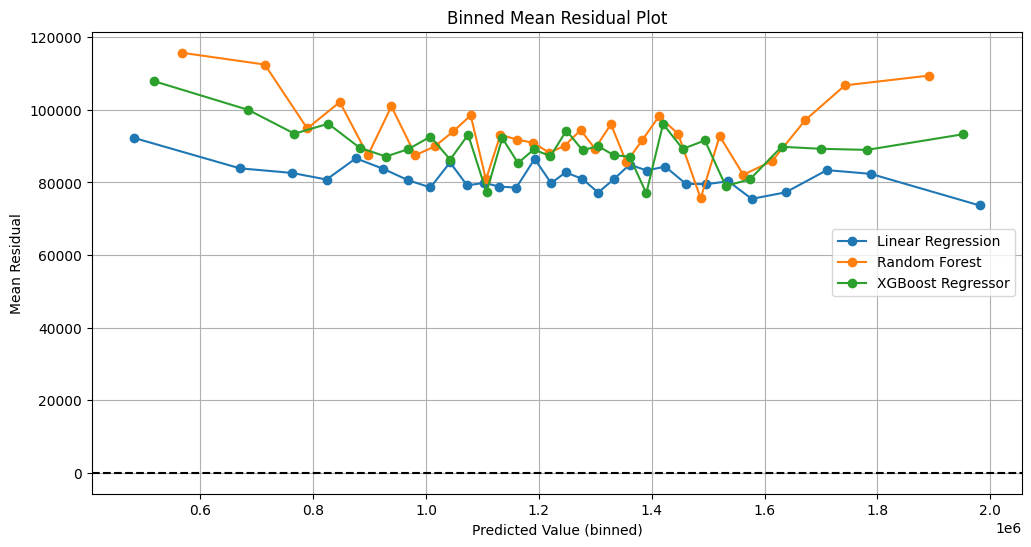

In [ ]:
def plot_binned_residuals(y_true, y_pred, label):
    df = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
    df['residual'] = df['y_true'] - df['y_pred']
    df['abs_residual'] = np.abs(df['residual'])

    # Bin by predicted values
    df['bin'] = pd.qcut(df['y_pred'], q=30, duplicates='drop')  # 20 quantile bins
    bin_means = df.groupby('bin', observed=True).mean(numeric_only=True)

    plt.plot(bin_means['y_pred'], bin_means['abs_residual'], label=label, marker='o')

# Plot both models
plt.figure(figsize=(12, 6))
plot_binned_residuals(results_df["y"], results_df["lr_y_pred"], 'Linear Regression')
plot_binned_residuals(results_df["y"], results_df["rf_y_pred"], 'Random Forest')
plot_binned_residuals(results_df["y"], results_df["xgb_y_pred"], 'XGBoost Regressor')

plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Predicted Value (binned)")
plt.ylabel("Mean Residual")
plt.title("Binned Mean Residual Plot")
plt.legend()
plt.grid(True)
plt.show()

Conclusion:

This study showed the comparison between Decision Tree, Random Forest and Linear Regression. Even with hyperparameter tuning, Linear Regression still topped the other two when comparing the coefficient of determination R².